In [40]:
# Nhập dữ liệu
# https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

import numpy as np
import pandas as pd

# data = pd.read_csv("/content/drive/MyDrive/dataset.csv")
data = pd.read_csv("dataset/dataset.csv")
print(data.head(5))

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


# Tiền xử lý dữ liệu

In [41]:
# Tiền xử lý dữ liệu
# Xóa những dòng có giá trị null

data.isnull().sum()
data = data.dropna()


In [42]:

# Kiểm tra dữ liệu trùng lặp
duplicate_rows = data[data.duplicated(subset=['track_id'])]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (24259, 21)


In [43]:
# Xóa dữ liệu trùng lặp
data = data.drop_duplicates(subset="track_id", keep='first', inplace=False)
print(data[data.duplicated(subset=['track_id'])].shape)

(0, 21)


# EDA

In [45]:
#Độ lơn của dữ liệu
print(data.shape)

(89740, 21)


In [46]:
# Các thuộc tính của dữ liệu
print(data.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [47]:
# Phân phối của các thuộc tính

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,89740.0,53479.005739,33410.141924,0.000,23766.75000,50680.500000,80618.500000,113999.000
popularity,89740.0,33.198808,20.580640,0.000,19.00000,33.000000,49.000000,100.000
duration_ms,89740.0,229144.365578,112945.780336,8586.000,173040.00000,213295.500000,264293.000000,5237295.000
danceability,89740.0,0.562166,0.176692,0.000,0.45000,0.576000,0.692000,0.985
energy,89740.0,0.634458,0.256606,0.000,0.45700,0.676000,0.853000,1.000
key,89740.0,5.283530,3.559912,0.000,2.00000,5.000000,8.000000,11.000
loudness,89740.0,-8.498994,5.221518,-49.531,-10.32225,-7.185000,-5.108000,4.532
mode,89740.0,0.636973,0.480875,0.000,0.00000,1.000000,1.000000,1.000
speechiness,89740.0,0.087442,0.113278,0.000,0.03600,0.048900,0.085900,0.965
acousticness,89740.0,0.328285,0.338321,0.000,0.01710,0.188000,0.625000,0.996


In [48]:
#Populatiry sorting
# Sắp xếp theo độ phổ biến

most_popular = data.query ('popularity>90', inplace = False).sort_values('popularity', ascending = False)
most_popular [:20]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
67359,67359,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,...,-5.198,0,0.2530,0.09930,0.000291,0.1260,0.187,106.672,4,latin
67358,67358,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,...,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin
20000,20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,...,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,4,dance
67559,67559,5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Un Verano Sin Ti,Efecto,96,213061,False,0.801,0.475,...,-8.797,0,0.0516,0.14100,0.000017,0.0639,0.234,98.047,4,latin
79000,79000,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,...,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4,piano
81052,81052,4LRPiXqCikLlN15c3yImP7,Harry Styles,As It Was,As It Was,95,167303,False,0.520,0.731,...,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4,pop


In [49]:
# Phan phối của các thể loại theo độ phổ biến

popularity_genre = data.groupby([data['track_genre']])['popularity'].mean().sort_values(ascending = False)
popularity_genre[:20]

track_genre
k-pop                59.423581
pop-film             59.096933
metal                56.422414
chill                53.738683
latino               51.788945
sad                  51.109929
grunge               50.587007
indian               49.765348
anime                48.776884
emo                  48.500000
reggaeton            48.270270
sertanejo            47.860775
piano                46.608312
progressive-house    46.537748
hard-rock            45.744711
pagode               45.585799
deep-house           45.573045
mandopop             45.071019
british              44.768889
metalcore            44.708914
Name: popularity, dtype: float64

In [50]:
# Phân phối các nghệ sĩ theo độ phổ biến
popularity_artist = data.groupby([data['artists']])['popularity'].mean().sort_values(ascending = False)
popularity_artist[:20]

artists
Sam Smith;Kim Petras           100.0
Bizarrap;Quevedo                99.0
Manuel Turizo                   98.0
Bad Bunny;Chencho Corleone      97.0
Bad Bunny;Bomba Estéreo         95.0
Joji                            94.0
Beyoncé                         93.0
Harry Styles                    92.0
Rema;Selena Gomez               92.0
Rauw Alejandro;Lyanno;Brray     91.0
Drake;21 Savage                 91.0
Luar La L                       91.0
Shakira;Rauw Alejandro          90.0
Beach Weather                   90.0
Ruth B.                         90.0
Elley Duhé                      90.0
Bad Bunny;Tony Dize             90.0
The Weeknd;Gesaffelstein        90.0
Bad Bunny;Rauw Alejandro        90.0
Future;Drake;Tems               89.0
Name: popularity, dtype: float64

In [51]:
# Phân phối các album theo độ phổ biến
popularity_album = data.groupby([data['album_name']])['popularity'].mean().sort_values(ascending = False)
popularity_album[:20]

album_name
Unholy (feat. Kim Petras)                                              100.0
Quevedo: Bzrp Music Sessions, Vol. 52                                   99.0
La Bachata                                                              98.0
I Ain’t Worried (Music From The Motion Picture "Top Gun: Maverick")     96.0
Indigo (Extended)                                                       96.0
PROVENZA                                                                93.0
RENAISSANCE                                                             93.0
Left and Right (Feat. Jung Kook of BTS)                                 92.0
Harry's House                                                           92.0
Calm Down (with Selena Gomez)                                           92.0
Super Freaky Girl                                                       92.0
L3tra                                                                   91.0
Honestly, Nevermind                                              

Genre analysis and visualization

Ở phần này, nhóm muốn đi sâu vào phân tích tương quan và sâu hơn để khám phá các yếu tố nào trong bài hát thể hiện mối tương quan cao hơn với 20 thể loại phổ biến nhất. Mục tiêu chính là xác định những yếu tố ảnh hưởng góp phần vào sự phổ biến của thể loại này. Từ đó, nhóm mong muốn đạt được những hiểu biết sâu sắc có giá trị về mối quan hệ cơ bản giữa đặc điểm âm nhạc và sở thích thể loại của người nghe.

In [52]:
# Nhóm sẽ tập trung vào 20 thể loại phổ biến nhất để thực hiện phân tích

genre_popularity = data.groupby('track_genre')['popularity'].mean()

genre_popularity_sorted = genre_popularity.sort_values(ascending=False)
# Đoạn code naỳ tính toán độ phổ biến trung bình cho mỗi thể loại và sắp xếp chúng theo thứ tự giảm dần.
top_genres = genre_popularity_sorted.head(20)

/tmp/ipykernel_3361/452883242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="husl")


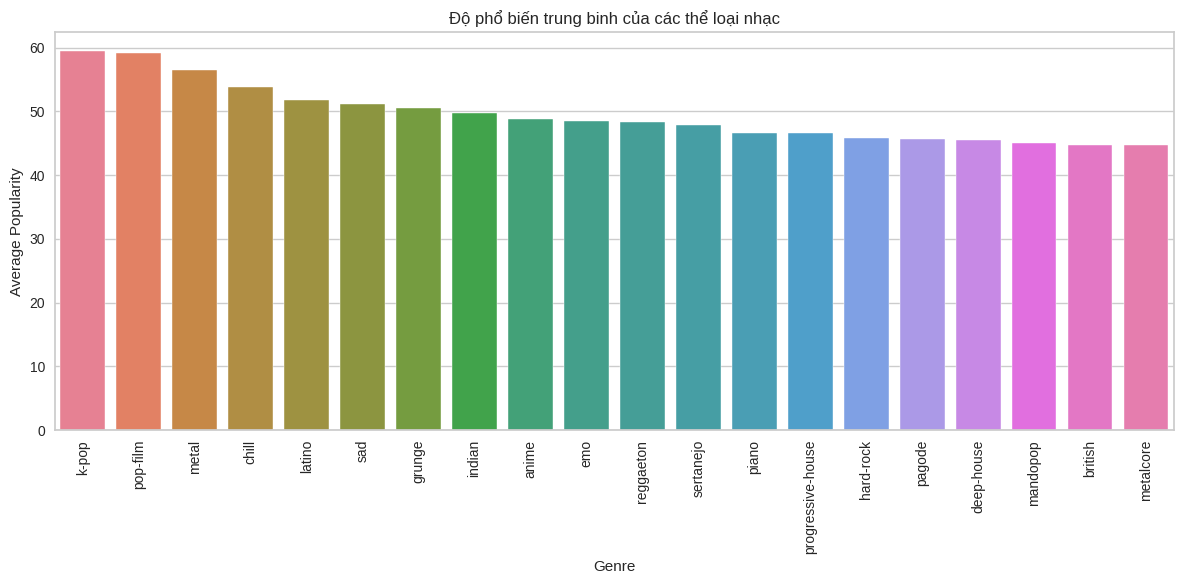

In [53]:
#Genre-based analysis of popularity
# Phân tích dựa trên thể loại của độ phổ biến
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="husl")
plt.title("Độ phổ biến trung binh của các thể loại nhạc")
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Kpop và Pop là 2 thể loại phổ biến nhất, theo sau là Metal Rock và Chill.

/tmp/ipykernel_3361/4151191951.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[data['track_genre'].isin(high_energy_genres.index)]['track_genre'], y='energy', data=data, palette="husl")


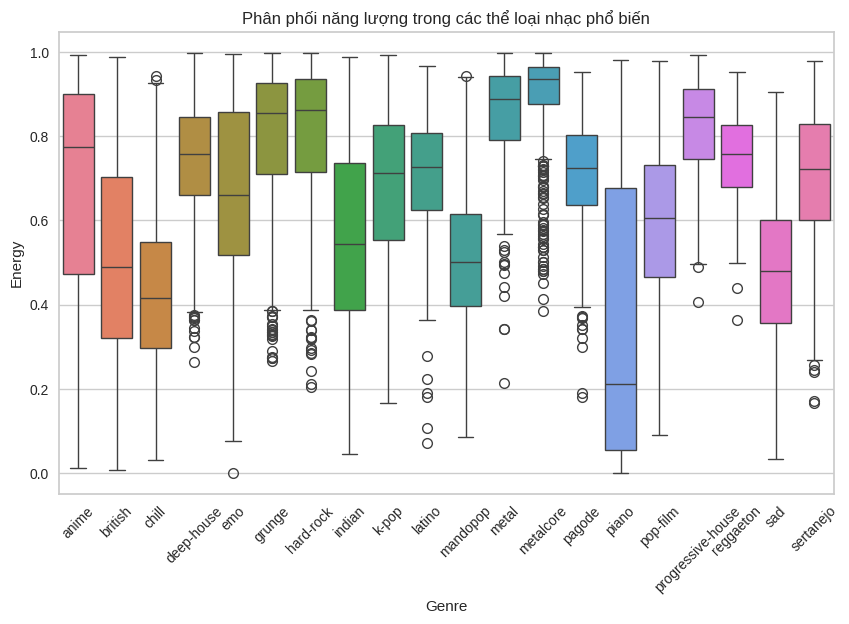

In [54]:
# Phân phối năng lượng trong các thể loại khác nhau
high_energy_genres = top_genres.head(20)

plt.figure(figsize=(10, 6))

# Box plot or violin plot for high energy genres
sns.boxplot(x=data[data['track_genre'].isin(high_energy_genres.index)]['track_genre'], y='energy', data=data, palette="husl")
plt.title("Phân phối năng lượng trong các thể loại nhạc phổ biến")
plt.xlabel("Genre")
plt.ylabel("Energy")
plt.xticks(rotation=45)


plt.show()

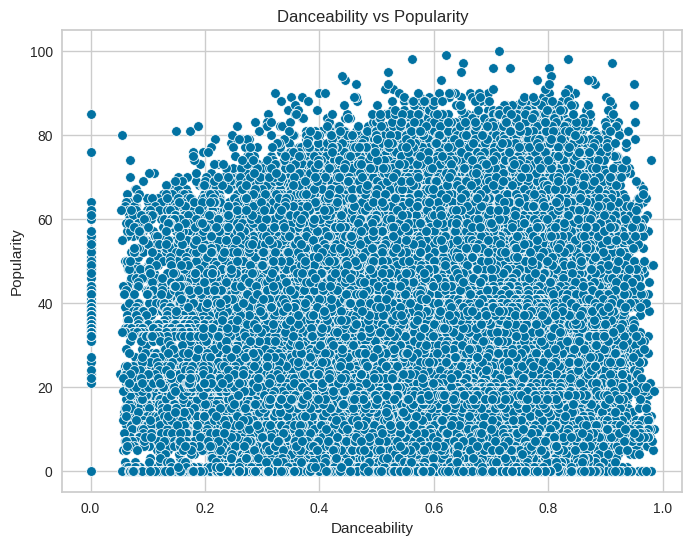

In [55]:
danceability = data['danceability']
popularity = data['popularity']


plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['danceability'], y=data['popularity'])
plt.title("Danceability vs Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

- Có vẻ như có nhiều bài hát có "danceability" cao nhưng không phải lúc nào cũng phổ biến. Nhưng vẫn có độ dốc nhất định cho thấy nhiều bài hát có "danceability" cao thì càng phổ biến hơn.

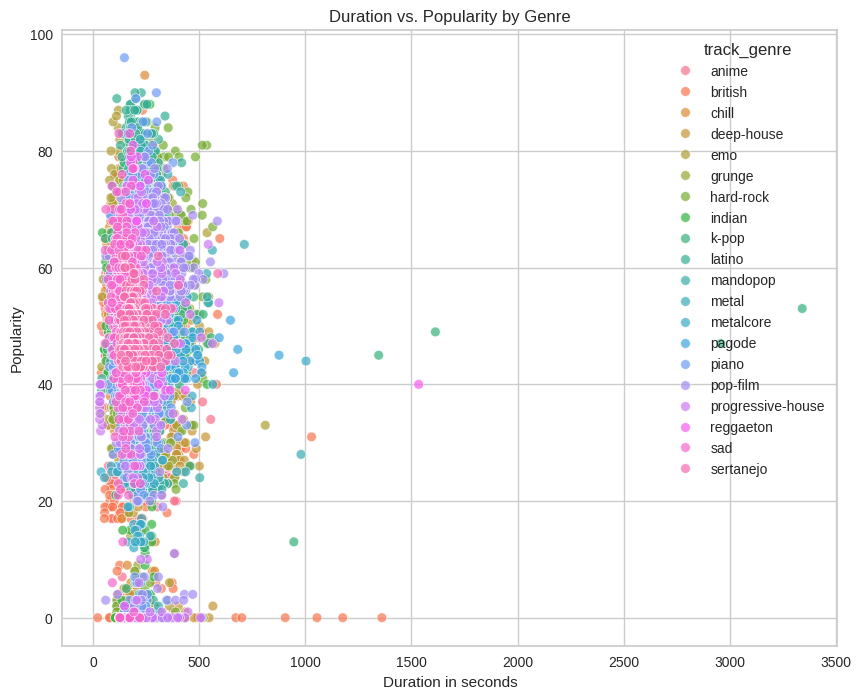

In [56]:
plt.figure(figsize=(10, 8))

# Scatter plot for duration vs popularity
# Tạo thêm cột duration để chuyển đổi thời lượng từ ms sang giây
data['duration'] = data['duration_ms'] / 1000

sns.scatterplot(x='duration', y='popularity', hue='track_genre', data=data[data['track_genre'].isin(top_genres.index)], alpha=0.7, palette='husl')
plt.title("Duration vs. Popularity by Genre")
plt.xlabel("Duration in seconds")
plt.ylabel("Popularity")


plt.show()

- Các bài hát phổ biến thường có thời lượng từ 230s đến 250s

## Kết luận EDA
- Kpop và Pop là 2 thể loại phổ biến nhất, theo sau là Metal Rock và Chill.
- Có vẻ như có nhiều bài hát có "danceability" cao nhưng không phải lúc nào cũng phổ biến. Nhưng vẫn có độ dốc nhất định cho thấy nhiều bài hát có "danceability" cao thì càng phổ biến hơn.
- Các bài hát phổ biến thường có thời lượng từ 230s đến 250s
- Chỉ số energy của bài hát thể hiện đúng tính chất của thể loại nhạc đó 
- Không thấy được sự tương quan rõ ràng giữa lời bài hát và độ phổ biến vì chỉ có biến explicit làm đại diện cho lời bài hát nhưng không đanh giá được chất lượng của lời bài hát 

# Bài toán phân cụm

## Mục tiêu của nhóm là xây dựng một hệ thống gợi ý dựa trên nội dung của bài hát. 
- Nhóm sẽ gom các thuộc tính ảnh hưởng tới nội dung của bài hát như danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, track_genre, explicit để phân cụm các bài hát.
- Nhóm sẽ test và đánh giá 4 phương pháp, mô hình phân cụm bao gồm K-means, Gaussian Mixture Model, DBSCAN và AutoEncoder kết hợp với K-means để chọn ra mô hình tốt nhất.
- Sau khi chọn ra mô hình tốt nhất, nhóm sẽ lưu lại mô hình và dữ liệu đã được gán nhãn để sử dụng cho việc gợi ý bài hát.
- Với mỗi bài hát đầu vào, hệ thống sẽ dùng mô hình đã được huấn luyện để dự báo nhãn của bài hát đó và tìm kiếm những bài hát có nhãn tương tự, tiếp theo sử dụng cosine similarity để tìm ra 10 bài hát tương tự nhất.   

Vì dữ liệu thuộc dải số lớn nên nhóm sẽ sử dụng MinMaxScaler để chuẩn hóa dữ liệu, chuẩn hóa các thuộc tính ảnh hưởng tới nội dung của bài hát như danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#train_data
music_features_train = data[['danceability', 'energy', 'key',
                             'loudness', 'mode', 'speechiness', 'acousticness',
                             'instrumentalness', 'liveness', 'valence', 'tempo']].values
music_features_scaled_train = scaler.fit_transform(music_features_train)
#Lưu lại scaler đã được fit
import pickle
filename = 'scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))
print(music_features_scaled_train.shape)

(89740, 11)


# K-means

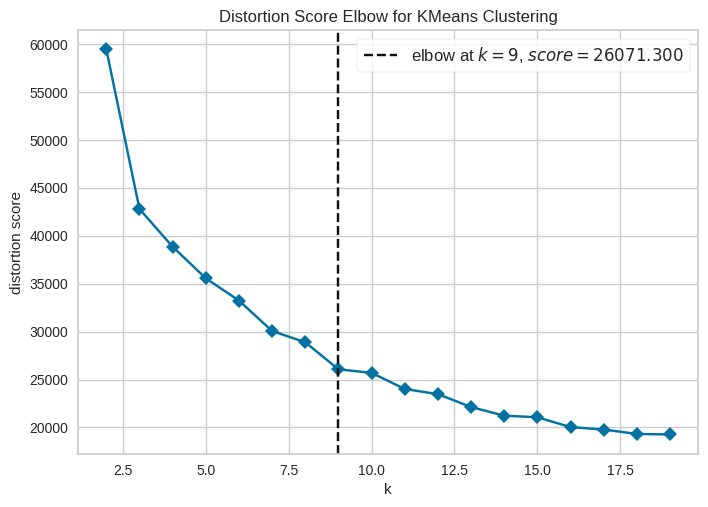

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
# Cho số lượng cụm để chạy tìm cụm nào cho điểm cao nhất
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init="k-means++")
visualizer = KElbowVisualizer(model, timings=False,  k=(2,20))
visualizer.fit(music_features_scaled_train)
visualizer.show()

Nhóm thử chạy chấm điểm silhouette để xem xét số cụm tốt nhất bằng phuơng pháp Elbow thì chọn số cụm là 9

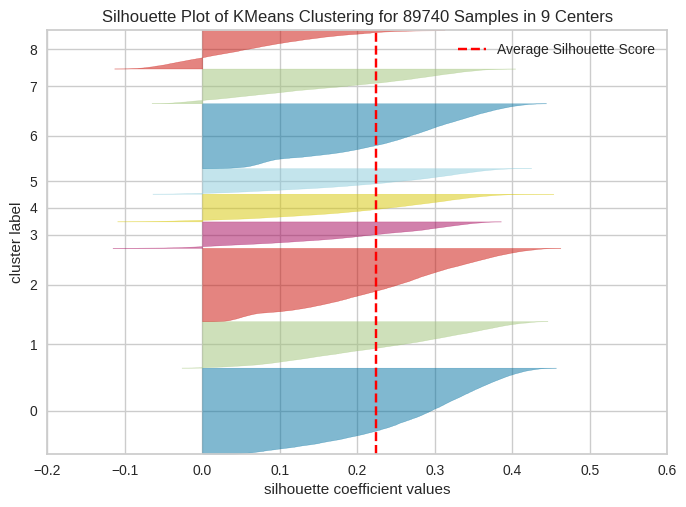

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 89740 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [83]:
# Test score

kmean = KMeans(init="k-means++", n_clusters=9)
visualizer = SilhouetteVisualizer(kmean, colors='yellowbrick')

visualizer.fit(music_features_scaled_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [84]:
print(f"Silhouette Score for KMeans", silhouette_score(music_features_scaled_train, kmean.labels_))

Silhouette Score for KMeans 0.22404101810199667


In [85]:
# Giảm chiều dữ liệu để vẽ biểu đồ mô tả phân cụm
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(music_features_scaled_train)

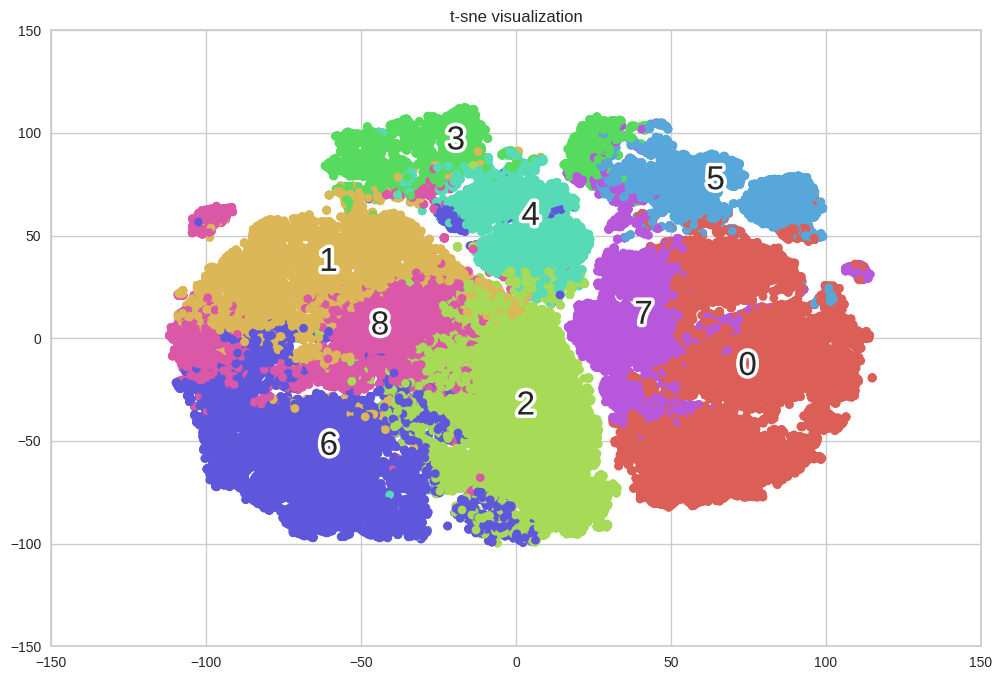

In [86]:
# Vẽ biểu đồ phân cụm (sử dụng được cho nhiều model khác nhau)


import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels])
    plt.xlim(-150, 150)
    plt.ylim(-150, 150)

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

_plot_kmean_scatter(tsne_results, kmean.labels_)

In [87]:
# Nhóm sẽ lưu lại dữ liệu và gắn nhãn để đánh giá tính chất của các cụm
k_mean_labels = kmean.labels_
k_mean_data_labels = data
k_mean_data_labels['cluster'] = k_mean_labels

k_mean_data_labels.to_csv('saved_data/k_mean_data_labels.csv')

In [88]:
# Lưu model
import pickle

filename = 'saved_model/kmean_model.sav'
pickle.dump(kmean, open(filename, 'wb'))

# Gaussian Mixture Model

- Sử dụng BIC score để chọn số cụm tốt nhất và loại covariance type tốt nhất

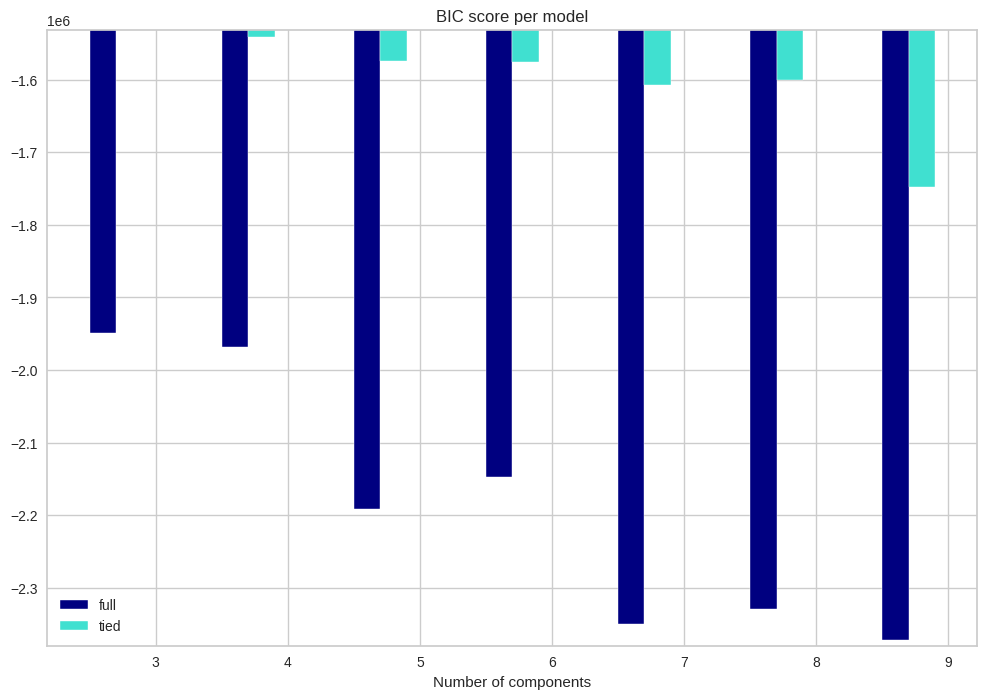

In [90]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

lowest_bic = np.infty
bic = []
n_components_range = range(3, 10)
# cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = ['full', 'tied']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit Gaussian mixture theo phương pháp huấn luyện EM
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type)
        gmm.fit(music_features_scaled_train)
        bic.append(gmm.bic(music_features_scaled_train))
        # Gán model có BIC scores thấp nhất là model tốt nhất
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise'])
clf = best_gmm
bars = []

# Vẽ biểu đồ BIC scores
plt.figure(figsize=(12, 8))
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

Nhìn vào bảng trên ta chọn được n = 9 và cv_type = full

In [91]:
# Test score

model = best_gmm
labels = model.predict(music_features_scaled_train)
print(np.unique(labels))

print(f"Silhouette Score for Gaussian Mixture Model", silhouette_score(music_features_scaled_train, labels))

[0 1 2 3 4 5 6 7 8]
Silhouette Score for Gaussian Mixture Model 0.042879683592459444


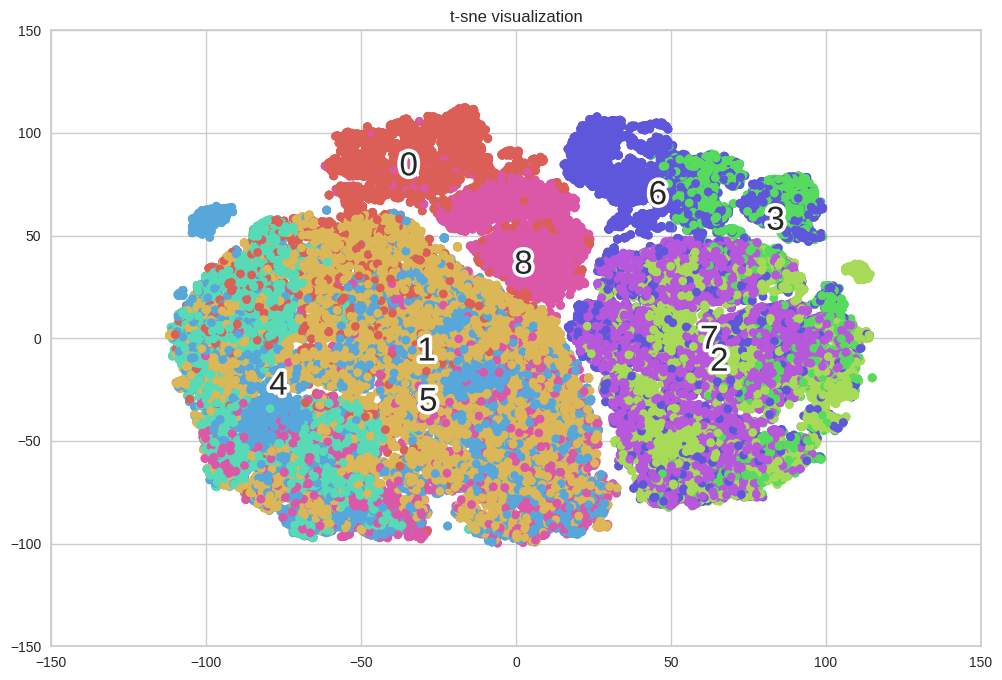

In [92]:
# Vẽ biểu đồ phân cụm
_plot_kmean_scatter(tsne_results, labels)

In [93]:
# Nhóm sẽ lưu lại dữ liệu và gắn nhãn để đánh giá tính chất của các cụm
gmm_labels = labels
gmm_data_labels = data
gmm_data_labels['cluster'] = labels

gmm_data_labels.to_csv('saved_data/gmm_data_labels.csv')

In [94]:
# Lưu model
import pickle

filename = 'saved_model/gmm_model.sav'
pickle.dump(best_gmm, open(filename, 'wb'))

# DBSCAN

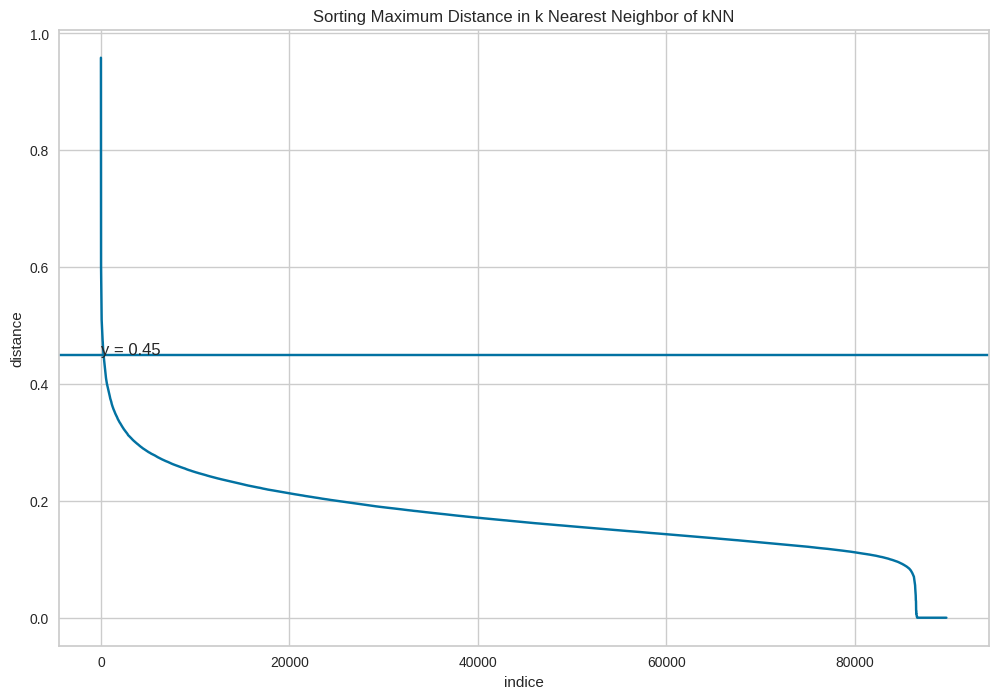

In [95]:
# Tìm eps bằng cách sử dụng NearestNeighbors với n_neighbors = minpts
# minpts >= data_dimension + 1
# Trong trường hơp này, nhóm chọn minpts = 5
# Nhóm sử dụng phương pháp k-Nearst Neighbors và phương pháp elbow để chọn eps
# neighbor = minpts = 5


import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

from sklearn.neighbors import NearestNeighbors


neighbors = 5
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(music_features_scaled_train)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(music_features_scaled_train)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=0.45)
plt.text(2, 0.45, 'y = 0.45', fontsize=12)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')
plt.show()

Ta thấy điểm elbow là 0.45 nên ta thử với elps = 0.45

/home/maxrave/PycharmProjects/Music Recommendation/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/maxrave/PycharmProjects/Music Recommendation/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


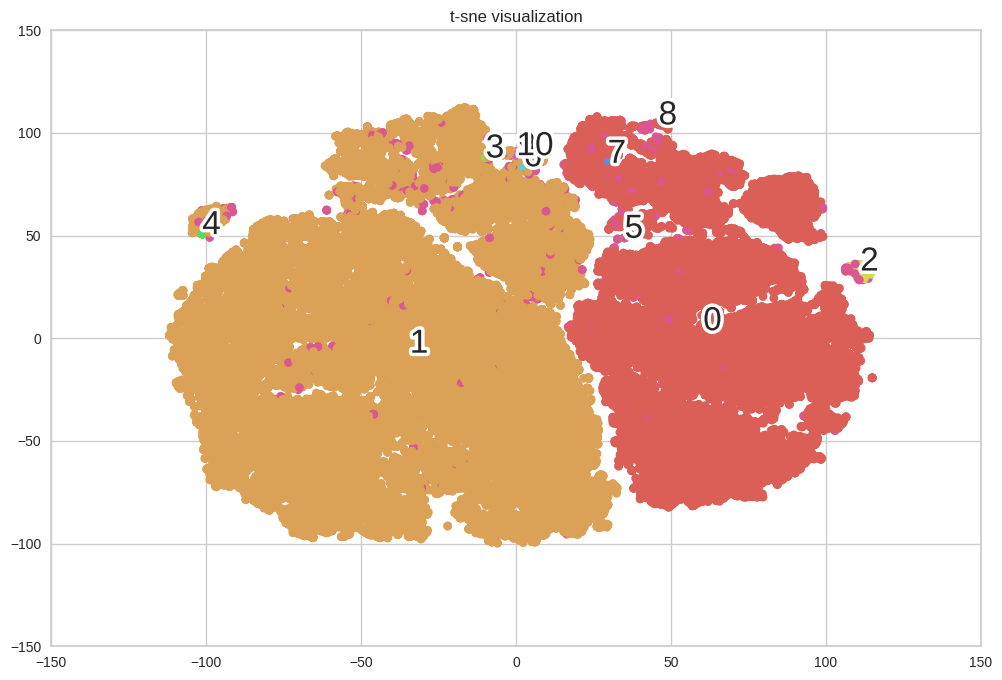

In [96]:
# Huấn luyện model 

dbscan = DBSCAN(eps=0.35,
       min_samples=5,
       metric='euclidean',
       algorithm='auto'
       )
dbscan.fit(music_features_scaled_train)

# Vẽ biểu đồ phân cụm
_plot_kmean_scatter(tsne_results, dbscan.labels_)

In [97]:
print(f"Silhouette Score for DBSCAN", silhouette_score(music_features_scaled_train, dbscan.labels_))

Silhouette Score for DBSCAN 0.19402222270887473


In [98]:
# Nhóm sẽ lưu lại dữ liệu và gắn nhãn để đánh giá tính chất của các cụm
dbscan_labels = dbscan.labels_
dbscan_data_labels = data
dbscan_data_labels['cluster'] = dbscan_labels

dbscan_data_labels.to_csv('saved_data/dbscan_data_labels.csv')

In [99]:
# Lưu model

import pickle

filename = 'saved_model/dbscan_model.sav'
pickle.dump(dbscan, open(filename, 'wb'))

# Sử dụng AutoEncoder kết hợp với K-means để phân cụm 

### AutoEncoder sẽ dùng để giảm chiều dữ liệu, sử dụng thư viện Tensorflow 

In [256]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

encoding_dim = 2

input_df = Input(shape=(11,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(5, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(11, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [257]:
autoencoder.fit(music_features_scaled_train, music_features_scaled_train, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - loss: 0.0640
Epoch 2/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - loss: 0.0362
Epoch 3/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - loss: 0.0329
Epoch 4/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - loss: 0.0292
Epoch 5/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - loss: 0.0275
Epoch 6/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - loss: 0.0267
Epoch 7/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - loss: 0.0264
Epoch 8/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0259
Epoch 9/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - loss: 0.0230
Epoch 10/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 0.0225
Epoch 11/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - loss: 0.0222
Epoch 12/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 0.0219
Epoch 13/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 0.0231
Epoch 14/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 0.0219
Epoch 15/25
702/702 ━━━━━━━━━

In [258]:
autoencoder.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 2)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 500)            │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 2000)           │     1,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 5)              │        10,005 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 2000)           │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 11)             │         5,511 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,846,122 (26.12 MB)

 Trainable params: 2,282,040 (8.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,564,082 (17.41 MB)

In [259]:
#Lưu lại model

autoencoder.save_weights('autoencoder.weights.h5')
autoencoder.save('autoencoder.keras')

In [247]:
music_features_scaled_train.shape

(89740, 11)

In [260]:

pred = encoder.predict(music_features_scaled_train)

2805/2805 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


In [178]:
print(pred.shape)

(89740, 10)


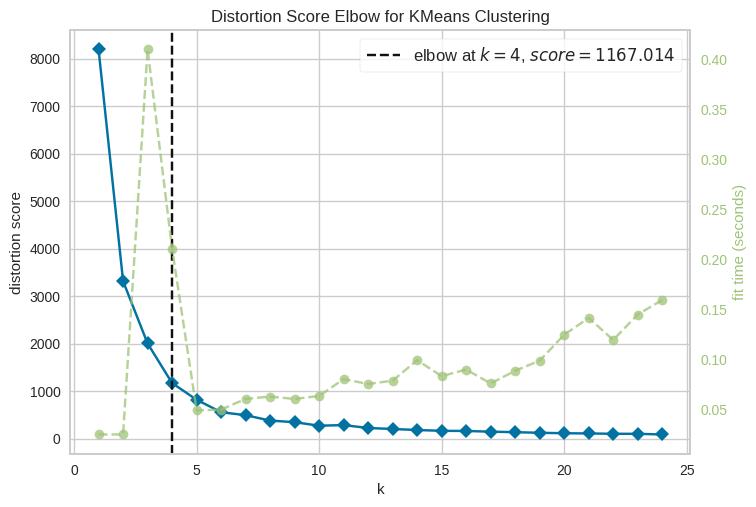

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [262]:
model = KMeans(init="k-means++")
visualizer = KElbowVisualizer(model, k=(1,25))
visualizer.fit(pred)
visualizer.show()

In [263]:
autoencoder_kmean_model = KMeans(init="k-means++", n_clusters=4)
autoencoder_kmean_model.fit(pred)
labels = autoencoder_kmean_model.labels_

In [264]:
print(pred[2])
print(np.unique(labels))

[0.         0.         0.         0.36398637 0.        ]
[0 1 2 3]


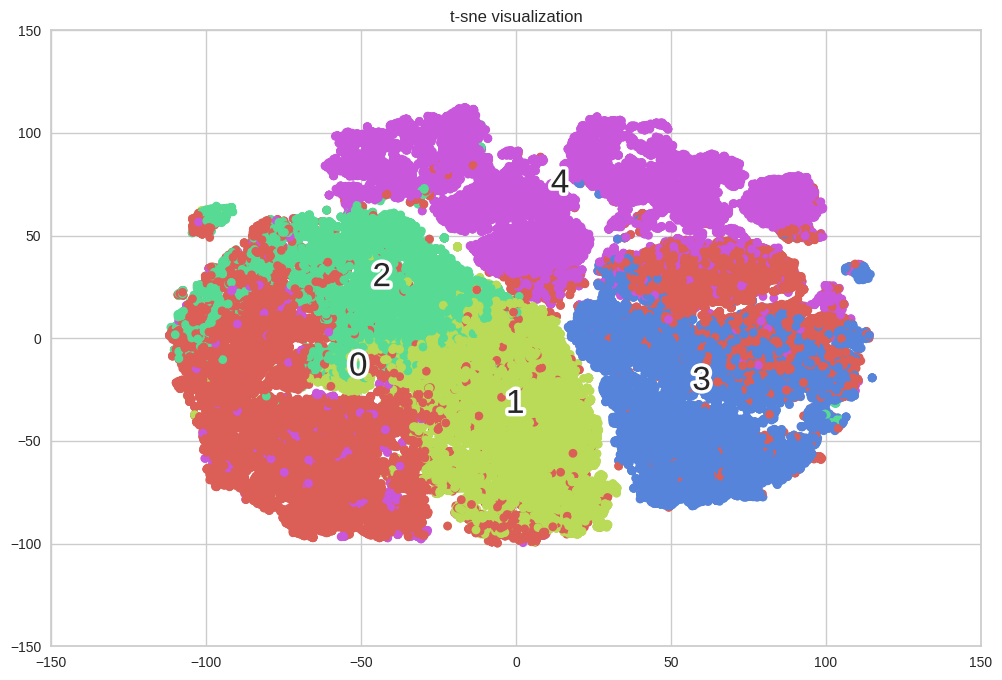

In [253]:
_plot_kmean_scatter(tsne_results, labels)

In [266]:
print(f"Silhouette Score for AutoEncoder + KMeans", silhouette_score(music_features_scaled_train, labels))

Silhouette Score for AutoEncoder + KMeans 0.20843678203869326


In [267]:
# Nhóm sẽ lưu lại dữ liệu và gắn nhãn để đánh giá tính chất của các cụm
kmean_autoencoder_labels = labels
kmean_autoencoder_data_labels = data
kmean_autoencoder_data_labels['cluster'] = labels

kmean_autoencoder_data_labels.to_csv('saved_data/kmean_autoencoder_data_labels.csv')

In [268]:
# Lưu model

import pickle

filename = 'saved_model/autoencoder_kmean_model.sav'
pickle.dump(autoencoder_kmean_model, open(filename, 'wb'))

# So sánh các mô hình

- Vì dữ liệu không gán nhãn nên nhóm sử dụng phương pháp intrinsic evaluation để đánh giá mô hình
- Nhóm sẽ sử dụng silhouette score để đánh giá mô hình và đánh giá dữ liệu đã gán nhãn thủ công để xem xét mô hình nào phù hợp nhất


## Với Silhouette Score
- K-means: 0.22404101810199667
- Gaussian Mixture Model: 0.042879683592459444
- DBSCAN: 0.19402222270887473
- AutoEncoder + K-means: 0.20843678203869326

### Với điểm số K-means cho kết quả tốt nhất
- Nhóm sẽ kiểm tra chất lưong của dữ liệu đã gán nhãn thủ công để xem xét mô hình nào phù hợp nhất

## Đánh giá mô hình

In [270]:
import numpy as np
import pandas as pd
k_mean_data_labels = pd.read_csv('saved_data/k_mean_data_labels.csv')
k_mean_data_labels['cluster'].unique()

array([0, 1, 6, 8, 2, 7, 3, 5, 4])

In [271]:
# Kiểm tra genre của các cụm
(k_mean_data_labels[k_mean_data_labels['cluster'] == 0])['track_genre'].value_counts()


track_genre
hardstyle      424
dance          420
dancehall      397
heavy-metal    381
turkish        363
              ... 
opera           11
sleep           10
tango           10
ambient          6
classical        4
Name: count, Length: 113, dtype: int64

In [272]:
(k_mean_data_labels[k_mean_data_labels['cluster'] == 1])['track_genre'].value_counts()

track_genre
opera             506
honky-tonk        462
cantopop          439
acoustic          431
show-tunes        431
                 ... 
minimal-techno      1
party               1
hardcore            1
death-metal         1
chicago-house       1
Name: count, Length: 104, dtype: int64

In [273]:
(k_mean_data_labels[k_mean_data_labels['cluster'] == 2])['track_genre'].value_counts()

track_genre
party        363
j-idol       350
country      347
alt-rock     315
grunge       302
            ... 
sleep          9
romance        7
classical      6
jazz           2
tango          2
Name: count, Length: 113, dtype: int64

## Kết luận 

Sau khi thử quan sát dữ liệu trên 3 cụm thì ta nhâận thấy được cụm 0 gồm những dòng nhạc năng lượng và tempo cao như hardstyle, dance, metal, .v.v, cụm 1 thì bao gồm các doòng nhạc nhẹ nhàng, truyền thống như opera, acoustic, folk, romance, .v.v, cụm 2 lại gồm những dòng nhạc sôi động hơn một chút như party, power-pop, .v.v      
 
Tuy nhiên khi quan sát dựa trên thể loại khá là khó nhận ra sự tương đồng giữa các bài hát dựa vào thể loại trong các cụm, chỉ là sự tương đối trong các chỉ số âm nhạc trong các cụm mà thôi, cùng với Điểm Silhoeutte gần về 0 như 0.2 của mô hình thì độ tương đồng chỉ đạt mức tuơng đối chấp nhận được mà thôi. 

=> Nhóm sẽ lựa chọn mô hình K-means để làm bộ gợi ý

Sau khi hoàn thành việc huấn luyện và gán nhãn dữ liệu, mục tiêu của đồ án sẽ là tạo ra một hệ thống gợi ý dựa trên nội dung của bài hát
Sau khi lựa chọn một bài hát bất kỳ từ dữ liệu, gom các thuôộc tinính laại, transform chúng bănằng Min Max Scaler đã đươợc lưu từ ban đầu
Hệ thống sẽ dự báo nhãn của bài hát đó và tìm kiếm những bài hát có nhãn tương tự
Sắp xếp theo similarity score và trả về 10 bài hát tương tự   

In [275]:
from keras.src.utils.module_utils import tensorflow
import pickle

# Hàm dự báo nhãn của bài hát

import scipy as sp
def predict_data(data):
    model = pickle.load(open('saved_model/kmean_model.sav', 'rb'))
    prediction = model.predict(data)
    return prediction
    


In [278]:
from sklearn.metrics.pairwise import cosine_similarity
import ast

def recommend_util(track_id, num_songs=10):
    if track_id not in data['track_id'].values:
        print(f"'{track_id}' not found in the dataset. Please enter a valid song name.")
        return


    song = (data.loc[data['track_id'] == track_id]).head(1)
    mf = song[['danceability', 'energy', 'key',
               'loudness', 'mode', 'speechiness', 'acousticness',
               'instrumentalness', 'liveness', 'valence', 'tempo']].values
    print(song['track_name'].values[0])
    
    scaler = pickle.load(open('scaler.sav', 'rb'))
    mfs = scaler.transform(mf)

    prediction_inp = predict_data(mfs)
    print(prediction_inp)
    
    data_labeled = pd.read_csv('saved_data/k_mean_data_labels.csv')
    same_cluster_songs = data_labeled.loc[data_labeled['cluster'] == prediction_inp[0]]
    print(f"Same Cluster",same_cluster_songs.shape)
    music_features_ar = same_cluster_songs[['danceability', 'energy', 'key',
                              'loudness', 'mode', 'speechiness', 'acousticness',
                              'instrumentalness', 'liveness', 'valence', 'tempo']].values
    music_features_ar_scaled = scaler.transform(music_features_ar)
    print(f"Music_feature_ar",music_features_ar.shape)
    
    similarity_scores = cosine_similarity(np.array(mfs), np.array(music_features_ar_scaled))

    # Get the indices of the most similar songs
    # Get first 100 song indices
    print(similarity_scores.shape)
    similar_song_indices = similarity_scores.argsort()[0][::-1][2:(num_songs+2)]
    print(similar_song_indices)
    
    # Sau đó sẽ sắp xếp dựa trên popularity 
    content_based_recommendations = same_cluster_songs.iloc[similar_song_indices, :].sort_values('popularity', ascending=False)

    return content_based_recommendations

In [279]:
from IPython.display import display, HTML
display(HTML(recommend_util("23L5CiUhw2jV1OIMwthR3S").to_html()))

In the Name of Love
[0]
Same Cluster (18246, 24)
Music_feature_ar (18246, 11)
(1, 18246)
[ 9534 10623 18215  4936   494  9423 14679 18003 13208  1644]


,Unnamed: 0.1,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration,cluster
88374,112501,112501,7LFIhRcOJ6UR5Q0gNWhgkO,Feride Hilal Akın;Hakan Tunçbilek,Gizli Aşk,Gizli Aşk,53,178285,False,0.473,0.710,6,-5.395,0,0.0325,0.181000,0.000000,0.470,0.178,140.211,4,turkish,178.285,0
2554,2556,2556,6GGaeNKmqQQfQmTlNoUezD,The Score,Victorious,Victorious,53,196616,False,0.509,0.715,5,-6.328,0,0.0419,0.030300,0.000004,0.468,0.277,159.872,4,alt-rock,196.616,0
43620,49352,49352,2kxeK97qaeEnpwIJDPYCQG,Coone,Like A Lion,Like A Lion,50,199740,False,0.510,0.679,6,-6.347,0,0.0656,0.033600,0.000000,0.517,0.250,155.056,4,hardstyle,199.740,0
48674,55632,55632,5UGdqRiBzhgjddkzAwphFy,H Dixit;DJ Lense;Lofi Person,Bewafa Nikli X Aaja ve Mahiya,Bewafa Nikli X Aaja ve Mahiya - Lofi- Slowed & Reverb,46,185004,False,0.596,0.557,5,-7.383,0,0.0323,0.123000,0.000009,0.335,0.194,140.229,4,indian,185.004,0
26787,28315,28315,62PQEEbjT0MfZAHv5rLeKk,Mendum,NCS: Infinity,Elysium,46,294861,False,0.331,0.512,3,-7.398,0,0.0462,0.139000,0.000002,0.391,0.198,139.072,4,dub,294.861,0
89208,113451,113451,1glJZF62bpxXzaF2N5YWdb,Hillsong Young & Free;TAYA,We Are Young & Free,Wake (Studio),44,254946,False,0.531,0.673,4,-4.753,0,0.0325,0.000362,0.000000,0.462,0.261,130.997,4,world-music,254.946,0
9139,9866,9866,2kq2ScpL7OelKExwi5ZEUC,Central 3,Não Há Outro Lugar (Ao Vivo),Não Há Outro Lugar (Ao Vivo),44,805687,False,0.403,0.730,4,-2.790,0,0.0356,0.210000,0.000054,0.552,0.225,141.075,4,brazil,805.687,0
59746,70825,70825,5NANgzJI7jatDJUaYxlVCn,黃仲崑,記得我,記得我,22,229600,False,0.643,0.580,4,-9.577,0,0.0300,0.035100,0.000011,0.338,0.207,126.089,4,mandopop,229.600,0
68685,82758,82758,3D4vCxJemidHRGSj85GnqN,Blondie,Autoamerican,Walk Like Me - Remastered,21,224960,False,0.614,0.664,4,-6.128,0,0.0505,0.075200,0.000126,0.581,0.369,158.974,4,power-pop,224.960,0
43849,49585,49585,3yZVwM2FWlEYhWNOfoPf3x,Sephyx;Syren,Hardstyle The Ultimate Collection Volume 1 2019 (Mix 2 By Outsiders),Breathe Hardstyle [Mixed],20,262466,False,0.528,0.705,4,-6.442,0,0.0394,0.090700,0.000037,0.593,0.155,149.944,4,hardstyle,262.466,0
